<a id="6"></a>
<h2 style="background-color: #65078f; font-size: 20px; color: #ffffff; text-align: center; font-family: 'Indie Flower', cursive; font-weight: bold; margin: 8px; border: 2px solid #2980b9; border-radius: 12px; padding: 15px;">Step 1. Imports</h2>


*  #### Import modules
*  #### Load dataframe



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler


from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
import scipy.cluster.hierarchy as sc

In [3]:
data=pd.read_csv("Wholesale customers data.csv")
data.head()

Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185

---

---

---

<a id="6"></a>
<h2 style="background-color: #65078f; font-size: 20px; color: #ffffff; text-align: center; font-family: 'Indie Flower', cursive; font-weight: bold; margin: 8px; border: 2px solid #2980b9; border-radius: 12px; padding: 15px;">Step 2. Preprocessing</h2>


*  #### Read Data
*  #### Detect and Handle outliers
*  #### Visualization


In [8]:
data.describe()

Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
min      1.000000    1.000000       3.000000     55.000000      3.000000   
25%      1.000000    2.000000    3127.750000   1533.000000   2153.000000   
50%      1.000000    3.000000    8504.000000   3627.000000   4755.500000   
75%      2.000000    3.000000   16933.750000   7190.250000  10655.750000   
max      2.000000    3.000000  112151.000000  73498.000000  92780.000000   

             Frozen  Detergents_Paper    Delicassen  
count    440.000000        440.000000    440.000000  
mean    3071.931818       2881.493182   1524.870455  
std     4854.673333       4767.854448   2820.105937  
min       25.000000          3.000000      3.000000  
25%      742.250000        256.750000    408.250000  
50%     1526.000000        816.500000    965.500000  
75%     3554.250000       3922.000000   1820.250000  
max    60869.000000      40827.000000  47943.000000

In [9]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [10]:
print(data['Channel'].value_counts())
print("\n\n\n")
print(data['Region'].value_counts())

Channel
1    298
2    142
Name: count, dtype: int64




Region
3    316
1     77
2     47
Name: count, dtype: int64


---

 
> ### Since the 'Region' and 'Channel' columns are discrete values it may distort our visualization and clustering so i will drop them
> ### But you can actually include it in the cluster and it also accurate

---

In [14]:
data.drop(columns=['Channel','Region'],inplace=True)

## Outliers

In [16]:
def detect_outliers(data,column):
    q1=data[column].quantile(0.25)
    q3=data[column].quantile(0.75)
    IQR=q3-q1
    lower_bound=q1-IQR*1.5
    upper_bound=q3+IQR*1.5
    outliers=[]
    for value in data[column]:
        if( value> upper_bound) or (value<lower_bound):
            outliers.append(value)
    print(' column : ', column)    
    print('upper_bound is ',upper_bound,' lower_bound is ',  lower_bound)
    print('outliers : ',outliers)

In [17]:
def handle_outliers(data,column):
    q1=data[column].quantile(0.25)
    q3=data[column].quantile(0.75)
    IQR=q3-q1
    lower_bound=q1-IQR*1.5
    upper_bound=q3+IQR*1.5
    for i in data.index:
        value=data.loc[i,column]
        if(value>upper_bound):
            data.loc[i,column]=upper_bound
        elif(value<lower_bound):
            data.loc[i,column]=lower_bound
    print('Done-->')
 

## Visualization

### Visualize with the outliers

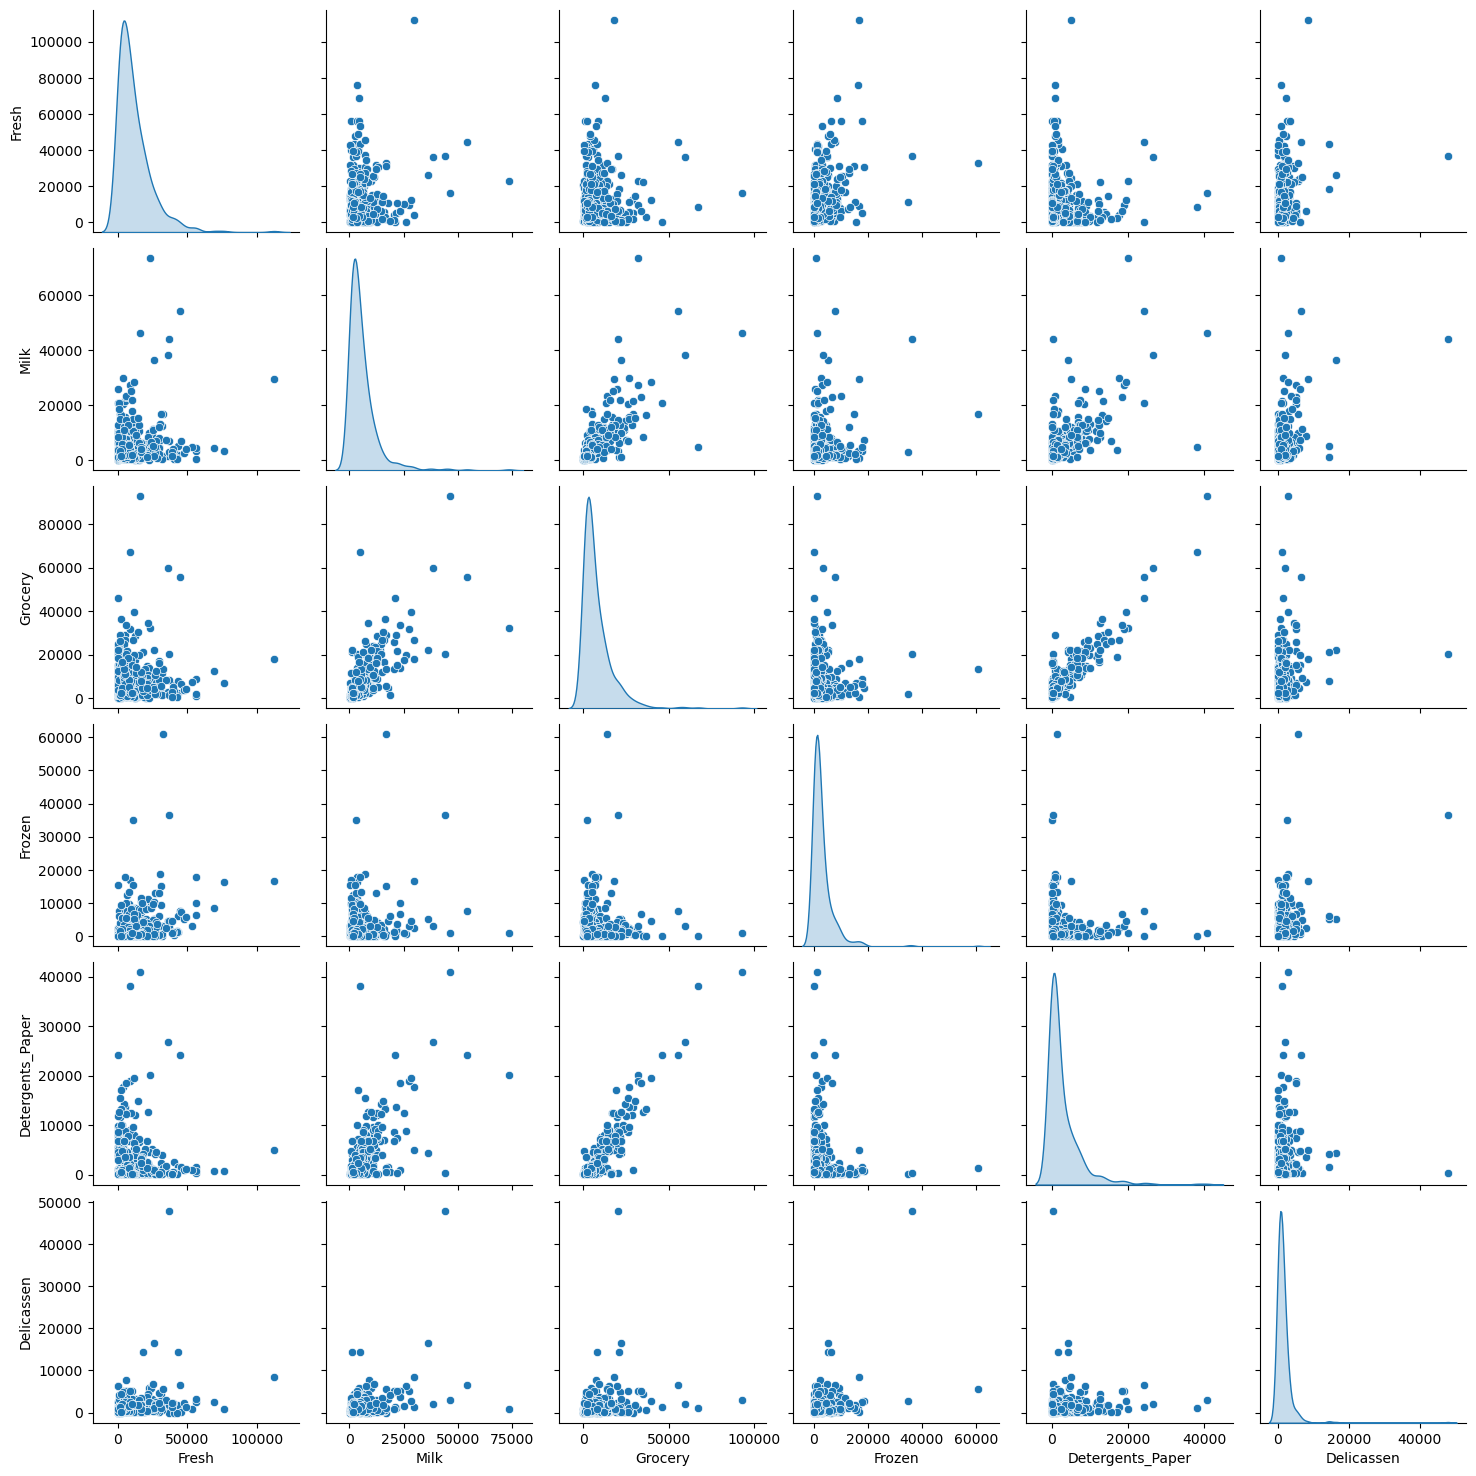

In [20]:
sns.pairplot(data, kind='scatter', diag_kind='kde')
plt.show()
# The plot is not well represented...So we should handle the Outliers 

In [21]:
detect_outliers(data,'Fresh')
print("\n\n\n\n\n\n\n")
detect_outliers(data,'Milk')
print("\n\n\n\n\n\n\n")
detect_outliers(data,'Grocery')
print("\n\n\n\n\n\n\n")
detect_outliers(data,'Frozen')
print("\n\n\n\n\n\n\n")
detect_outliers(data,'Detergents_Paper')
print("\n\n\n\n\n\n\n")
detect_outliers(data,'Delicassen')
print("\n\n\n\n\n\n\n")

 column :  Fresh
upper_bound is  37642.75  lower_bound is  -17581.25
outliers :  [43088, 56159, 44466, 40721, 43265, 56082, 76237, 42312, 45640, 112151, 47493, 56083, 53205, 49063, 68951, 40254, 42786, 39679, 38793, 39228]








 column :  Milk
upper_bound is  15676.125  lower_bound is  -6952.875
outliers :  [36423, 20484, 15729, 22044, 54259, 21412, 29892, 38369, 20959, 46197, 73498, 27472, 16729, 15726, 25862, 29627, 43950, 28326, 16599, 23133, 17972, 23527, 20655, 25071, 16784, 18664, 21858, 16687]








 column :  Grocery
upper_bound is  23409.875  lower_bound is  -10601.125
outliers :  [25957, 23998, 55571, 28921, 26866, 59598, 45828, 28540, 92780, 32114, 32034, 28986, 34792, 26870, 24708, 23596, 39694, 36486, 33586, 24773, 26839, 67298, 26316, 30243]








 column :  Frozen
upper_bound is  7772.25  lower_bound is  -3475.75
outliers :  [9408, 10002, 9510, 7782, 10643, 8872, 8132, 9735, 8693, 35009, 18028, 8853, 16538, 8195, 8425, 16745, 36534, 7888, 18711, 8321, 11422, 10155

In [22]:
handle_outliers(data,'Fresh')
handle_outliers(data,'Milk')
handle_outliers(data,'Grocery')
handle_outliers(data,'Frozen')
handle_outliers(data,'Detergents_Paper')
handle_outliers(data,'Delicassen')


Done-->
Done-->
Done-->
Done-->
Done-->
Done-->


### Visualize without the outliers

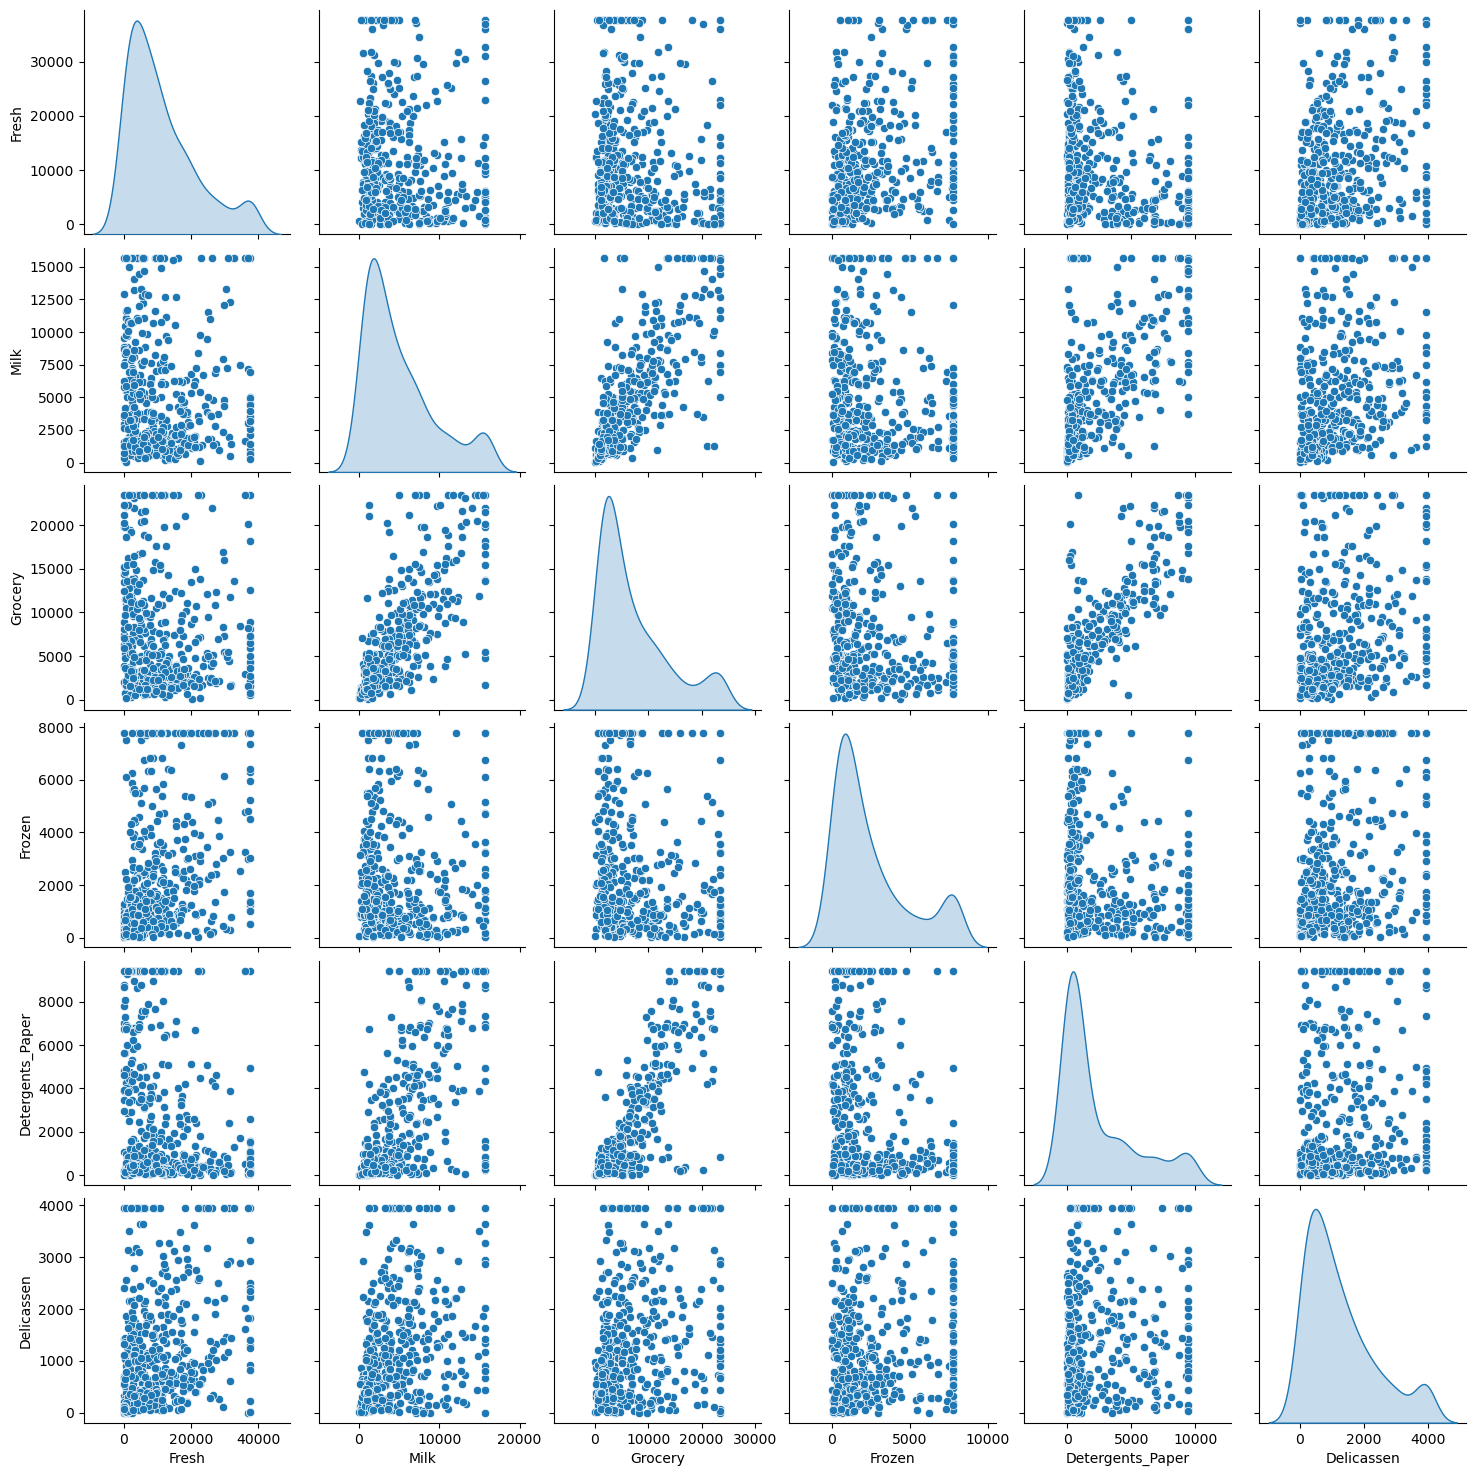

In [24]:
sns.pairplot(data, kind='scatter', diag_kind='kde')
plt.show()

---

---

---

<a id="6"></a>
<h2 style="background-color: #65078f; font-size: 20px; color: #ffffff; text-align: center; font-family: 'Indie Flower', cursive; font-weight: bold; margin: 8px; border: 2px solid #2980b9; border-radius: 12px; padding: 15px;">Step 3. Modeling</h2>


*  #### Scaling Data
*  #### Models
   > #### KMeans
   > #### DBSCAN
   > #### Hierarchical
*  #### 3D KMeans


# **Models**

In [44]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

### Scaling the Data

In [47]:
X=data.iloc[::].values
print(X.shape)
X

(440, 6)


array([[12669.   ,  9656.   ,  7561.   ,   214.   ,  2674.   ,  1338.   ],
       [ 7057.   ,  9810.   ,  9568.   ,  1762.   ,  3293.   ,  1776.   ],
       [ 6353.   ,  8808.   ,  7684.   ,  2405.   ,  3516.   ,  3938.25 ],
       ...,
       [14531.   , 15488.   , 23409.875,   437.   ,  9419.875,  1867.   ],
       [10290.   ,  1981.   ,  2232.   ,  1038.   ,   168.   ,  2125.   ],
       [ 2787.   ,  1698.   ,  2510.   ,    65.   ,   477.   ,    52.   ]])

In [49]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

---

## K-Means

In [52]:
wcss=[]
for i in range(1,11):
  model=KMeans(n_clusters=i,init='k-means++',random_state=42)
  model.fit(X)
  wcss.append(model.inertia_)

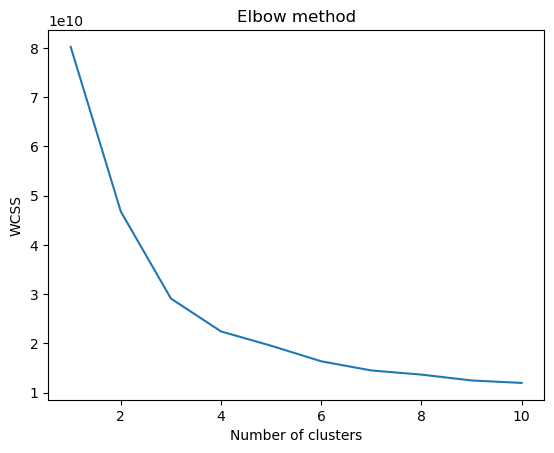

In [54]:
plt.plot(range(1,11),wcss)
plt.title("Elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [56]:
# Kmeans model
kmeans = KMeans(n_clusters = 4, init='k-means++',  random_state = 42)
kmeans_scaled = KMeans(n_clusters = 4, init='k-means++',  random_state = 42)

# Fit and predict on the data
y_kmeans = kmeans.fit_predict(X)
print(y_kmeans.shape)
print(y_kmeans)


# Fit ans predict on the Scaled data
y_kmeans_scaled = kmeans_scaled.fit_predict(X_scaled)
print(y_kmeans_scaled.shape)
y_kmeans_scaled

(440,)
[2 3 0 2 2 0 2 0 0 3 3 2 1 2 1 0 3 0 2 0 2 0 1 1 1 2 0 2 3 1 2 0 2 1 0 0 1
 3 3 1 1 2 3 3 3 3 3 1 2 3 0 0 1 3 1 0 3 3 2 0 0 1 0 3 0 3 0 2 0 0 2 3 0 2
 0 2 0 3 2 0 0 3 3 2 2 3 3 1 0 1 2 2 3 2 3 0 0 0 0 0 3 3 0 1 2 2 3 3 0 3 2
 3 2 2 2 2 2 0 2 0 2 0 2 2 1 1 2 2 0 1 0 0 2 0 0 0 0 0 2 0 2 1 1 2 2 3 0 0
 0 1 2 0 2 0 0 3 3 2 0 3 3 2 2 3 0 3 0 0 0 0 3 3 0 3 0 3 1 2 2 0 2 1 3 1 0
 0 0 0 3 3 2 2 0 3 0 2 1 3 2 0 3 3 1 0 0 3 0 0 0 3 2 3 0 0 3 3 3 2 3 0 2 3
 0 0 0 2 2 0 0 0 2 0 1 0 2 0 0 2 0 1 2 2 2 2 3 3 0 2 2 0 0 3 0 1 2 1 2 0 1
 1 0 0 2 0 3 3 3 2 3 2 0 0 0 1 0 0 1 0 2 2 0 2 1 1 1 1 0 2 2 1 0 0 0 3 2 0
 2 0 0 0 2 3 0 3 3 3 3 2 0 3 0 1 3 0 2 3 0 0 2 3 0 0 2 2 1 1 0 0 2 0 0 3 2
 3 2 1 2 0 0 0 0 3 0 3 0 0 3 1 0 3 0 3 0 3 2 0 2 3 0 0 2 0 0 0 0 0 0 0 2 0
 1 2 0 2 0 0 3 1 0 0 1 2 1 0 3 2 0 2 0 0 0 0 0 2 2 0 3 2 2 0 0 1 1 1 2 0 1
 3 0 0 0 0 0 0 0 0 3 0 3 0 3 2 1 2 2 2 3 1 0 0 3 0 2 0 2 1 1 3 0 0]
(440,)


array([2, 0, 3, 1, 3, 2, 2, 2, 2, 0, 0, 2, 3, 0, 3, 2, 0, 2, 3, 2, 2, 2,
       1, 3, 3, 2, 2, 2, 3, 2, 3, 2, 2, 1, 2, 0, 3, 0, 0, 1, 1, 2, 0, 0,
       0, 3, 0, 3, 0, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 3, 2, 0, 2, 0,
       2, 0, 1, 2, 1, 3, 1, 1, 2, 1, 1, 0, 2, 2, 2, 0, 3, 2, 2, 3, 0, 1,
       1, 1, 2, 1, 3, 1, 0, 2, 2, 2, 2, 1, 3, 0, 0, 1, 2, 2, 0, 0, 2, 0,
       2, 0, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 3, 2, 2, 1, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 2, 3, 3, 2, 2, 2, 0, 3, 2, 0, 2, 0,
       1, 2, 2, 1, 2, 3, 0, 3, 2, 2, 2, 1, 0, 0, 1, 2, 2, 0, 2, 1, 1, 0,
       2, 2, 0, 0, 3, 2, 2, 0, 2, 2, 2, 0, 2, 3, 2, 2, 0, 0, 0, 2, 3, 2,
       2, 0, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 2,
       2, 2, 0, 0, 2, 2, 2, 1, 2, 3, 1, 2, 3, 1, 2, 1, 1, 1, 2, 1, 2, 2,
       0, 3, 0, 1, 0, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2,
       2, 1, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,

## Visualization Original Data

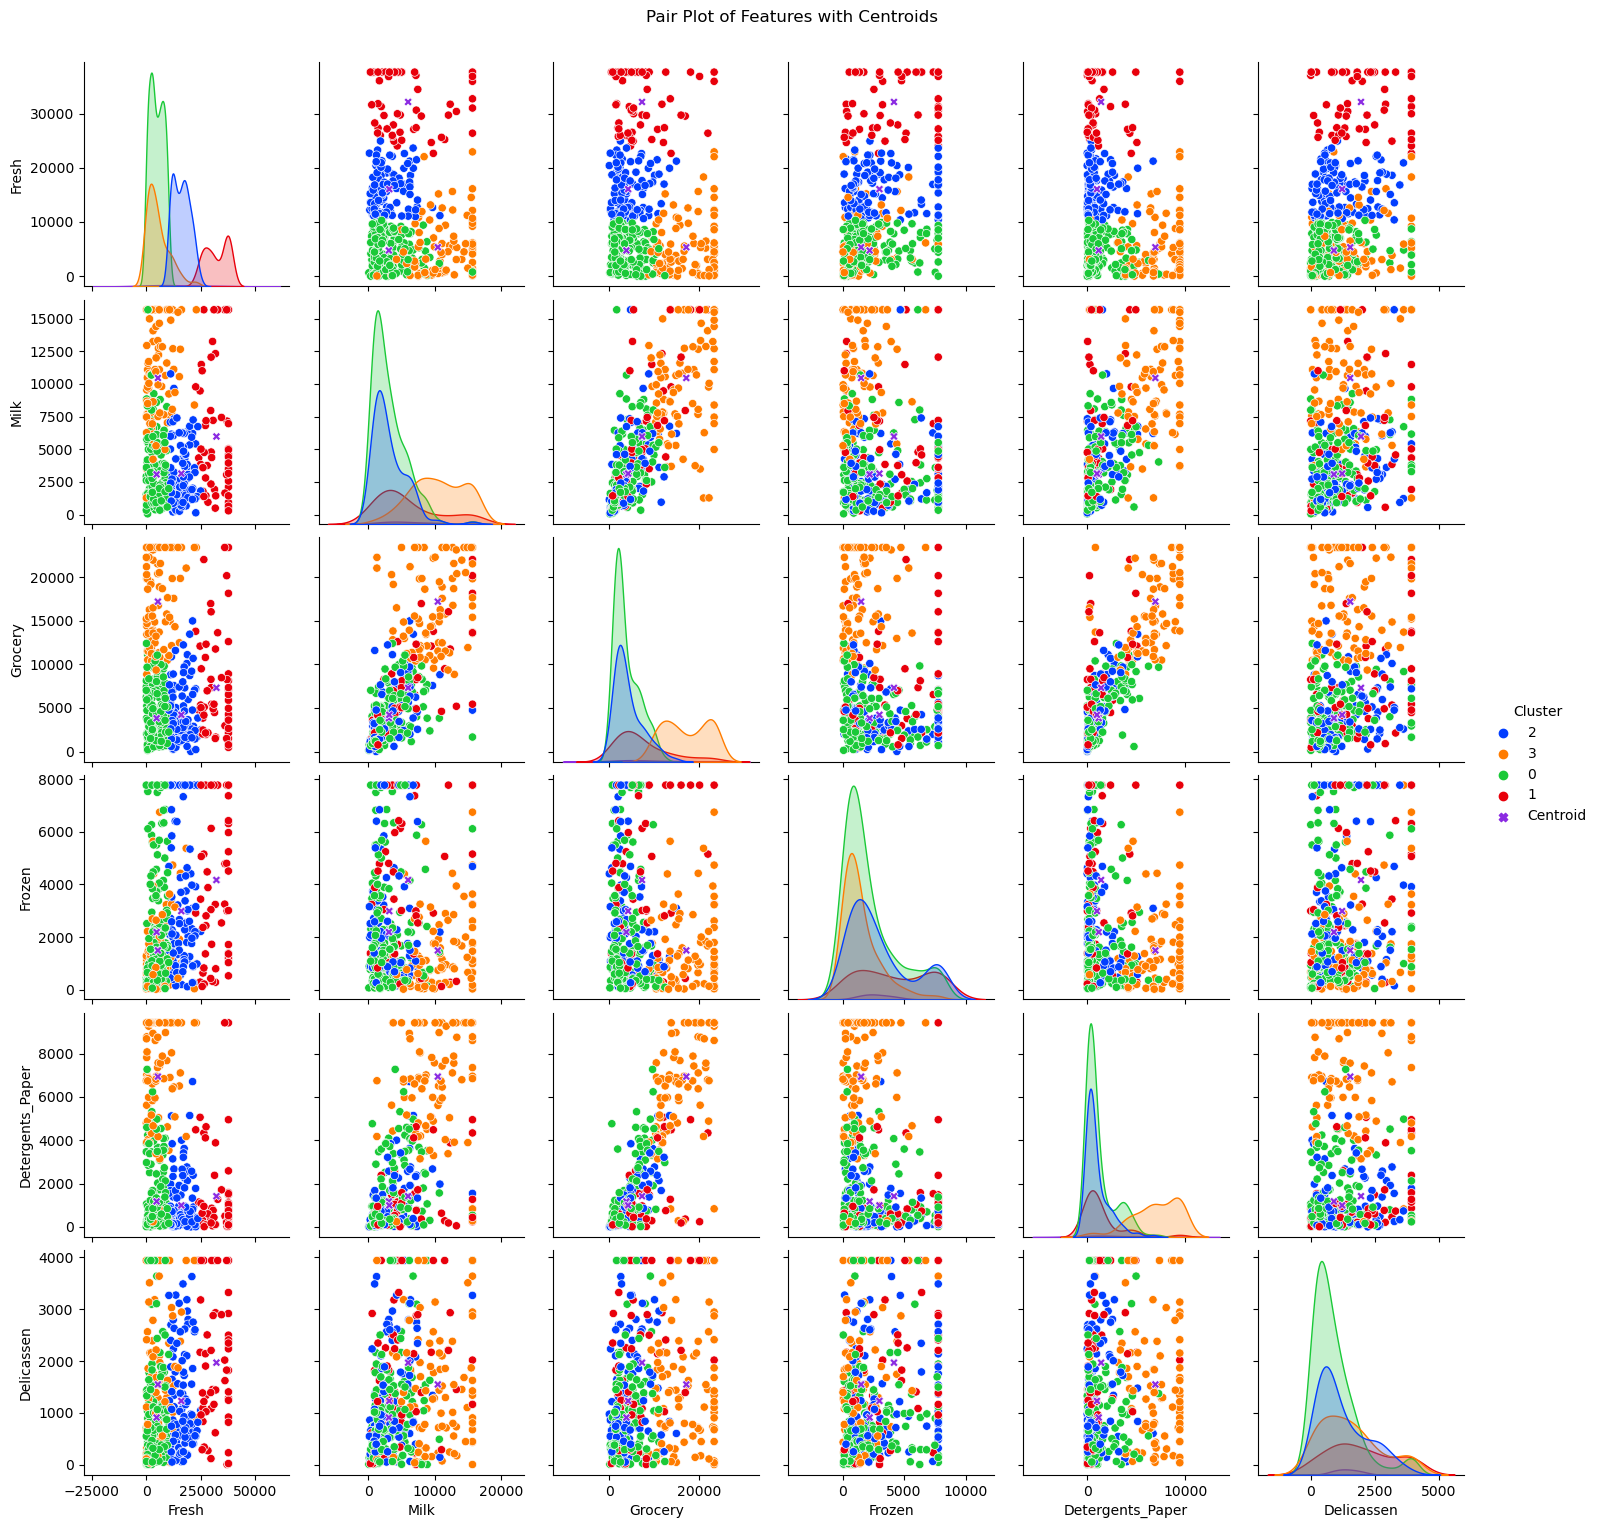

In [59]:
features = data.columns
df = pd.DataFrame(X, columns=features)

df['Cluster'] = y_kmeans

centroids_df = pd.DataFrame(kmeans.cluster_centers_, columns=features)
centroids_df['Cluster'] = ['Centroid'] * kmeans.n_clusters

combined_df = pd.concat([df, centroids_df], ignore_index=True)

sns.pairplot(combined_df, hue='Cluster', palette='bright', markers=['o']*kmeans.n_clusters + ['X'])

plt.suptitle('Pair Plot of Features with Centroids', y=1.02)
plt.show()

## Visualiztion Scaled data

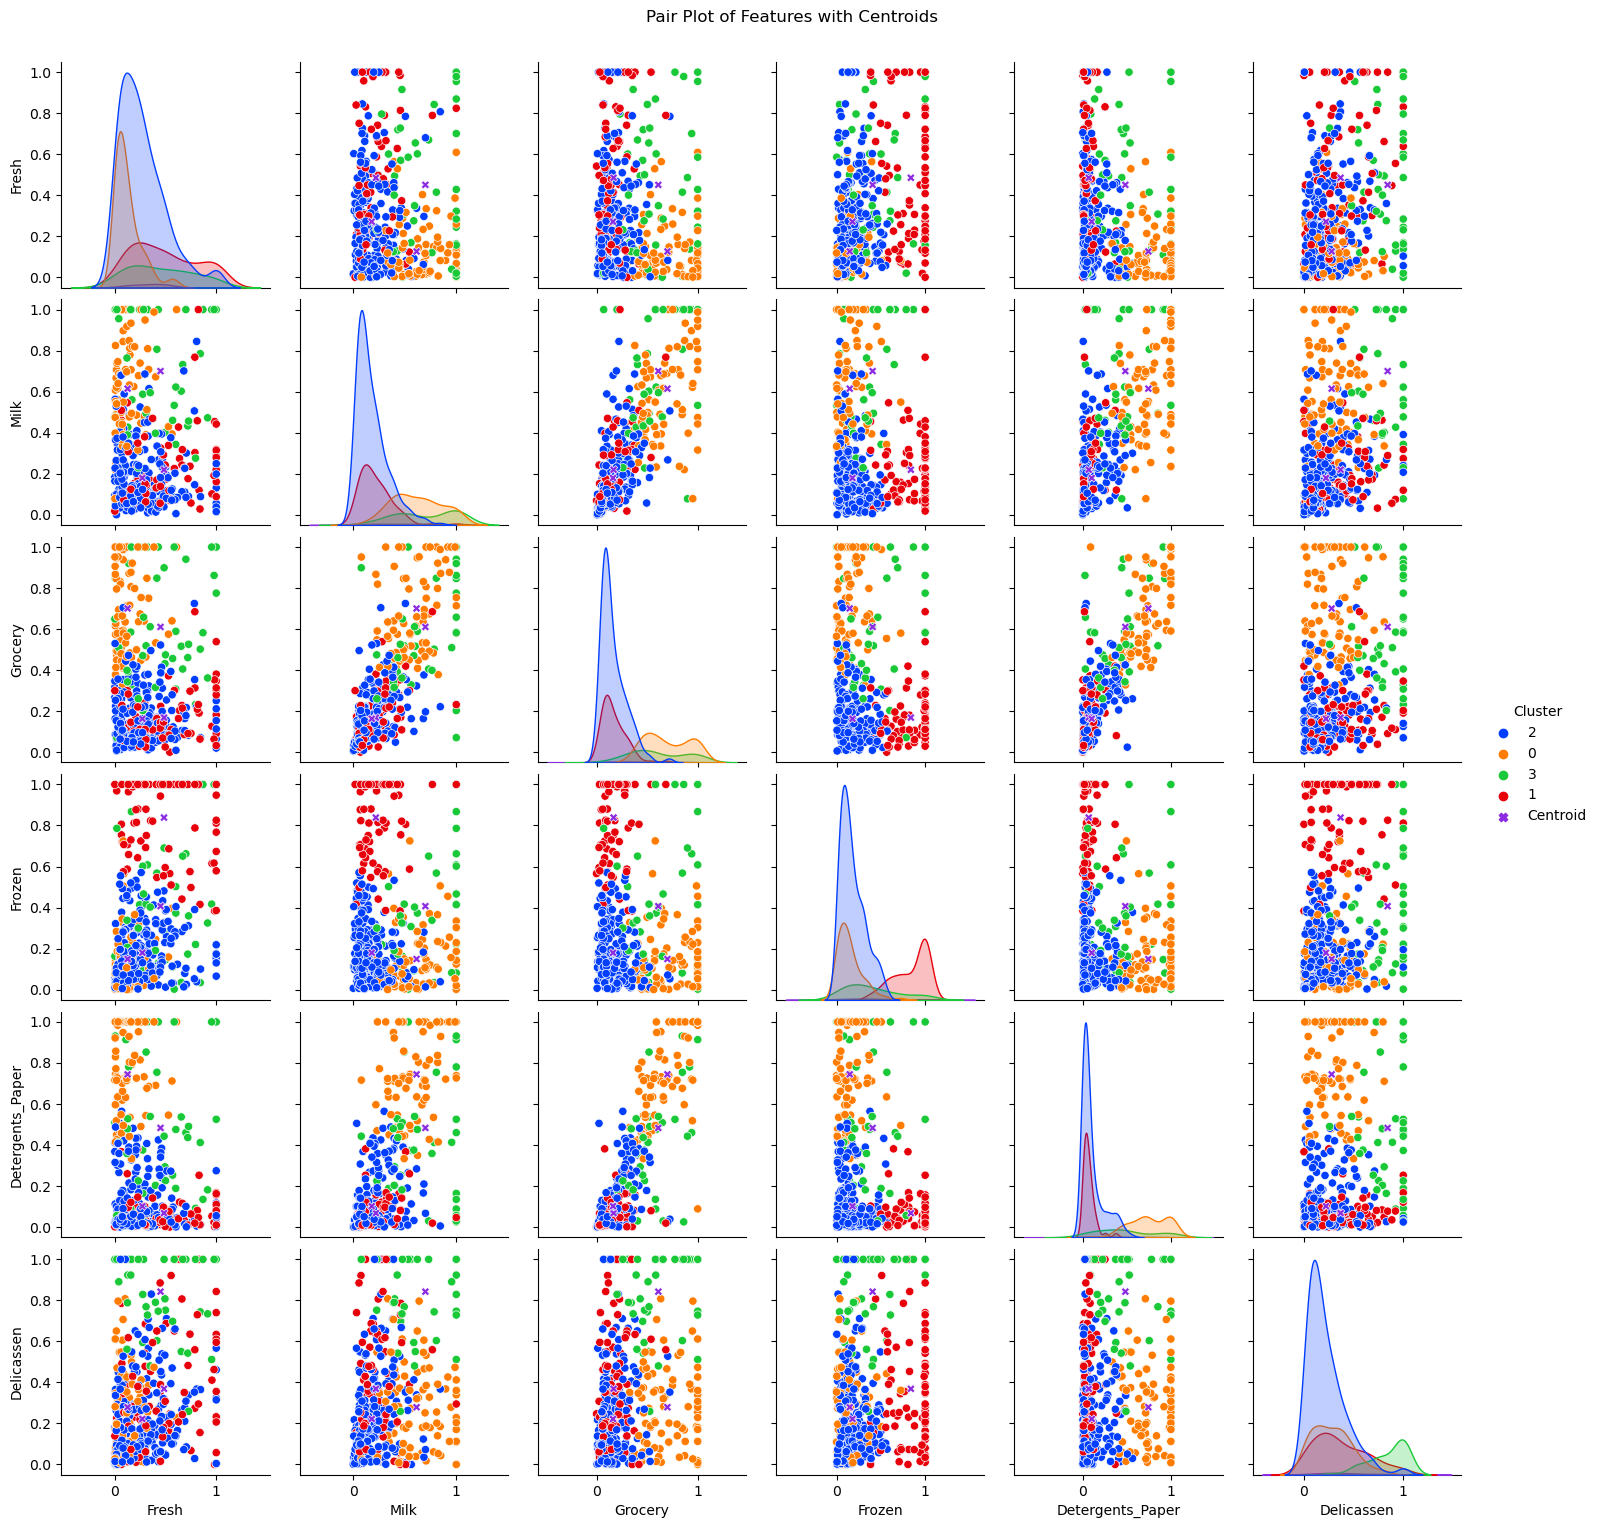

In [61]:
features = data.columns
df = pd.DataFrame(X_scaled, columns=features)

df['Cluster'] = y_kmeans_scaled

centroids_df_scaled = pd.DataFrame(kmeans_scaled.cluster_centers_, columns=features)
centroids_df_scaled['Cluster'] = ['Centroid'] * kmeans_scaled.n_clusters

combined_df_scaled = pd.concat([df, centroids_df_scaled], ignore_index=True)

sns.pairplot(combined_df_scaled, hue='Cluster', palette='bright', markers=['o']*kmeans_scaled.n_clusters + ['X'])

plt.suptitle('Pair Plot of Features with Centroids', y=1.02)
plt.show()

Text(0.5, 1.0, 'Customer clustering Scaled ')

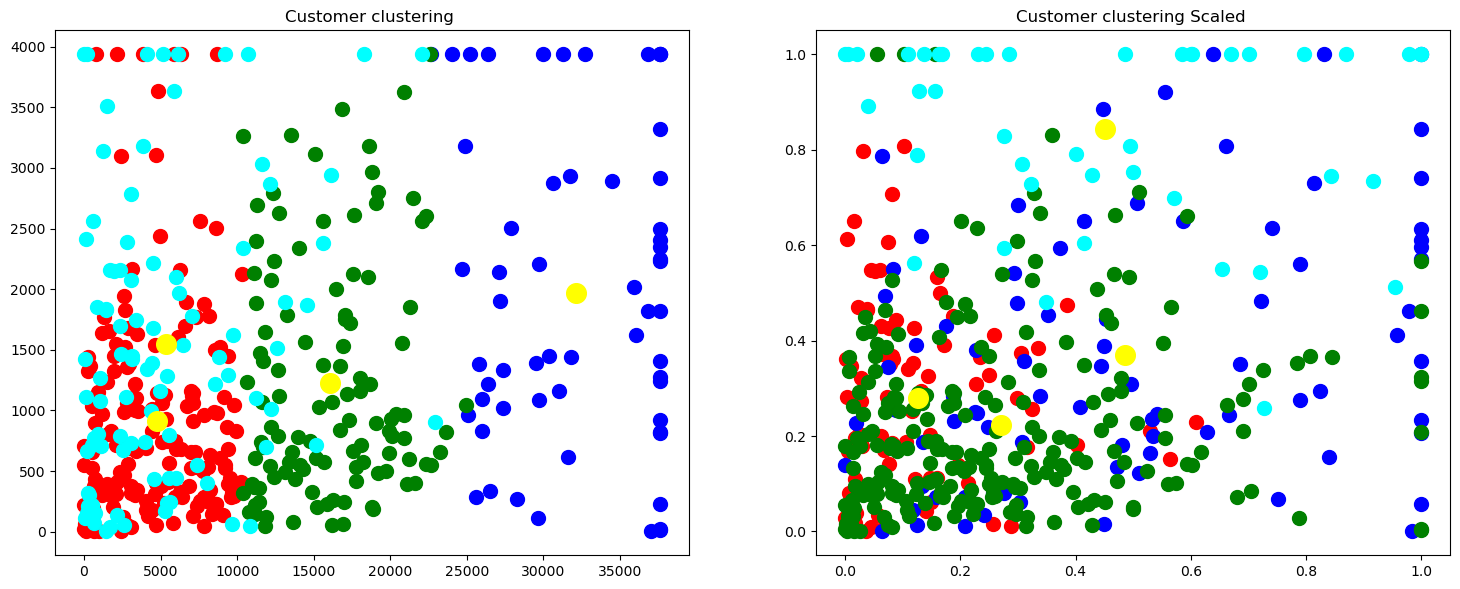

In [66]:
# View in 2D any two features you want with the centroids by adjust the index in X and X_scaled

plt.figure(figsize=(18,15))
plt.subplot(2,2,1)
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,5],s=100,c='red',label='cluster1 ')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,5],s=100,c='blue',label='cluster2 ')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,5],s=100,c='green',label='cluster3 ')
plt.scatter(X[y_kmeans==3,0],X[y_kmeans==3,5],s=100,c='cyan',label='cluster4 ')
plt.scatter(X[y_kmeans==4,0],X[y_kmeans==4,5],s=100,c='magenta',label='cluster5 ')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,5],s=200,c='yellow',label="centroid")
plt.title("Customer clustering ")


plt.subplot(2,2,2)
plt.scatter(X_scaled[y_kmeans_scaled==0,0],X_scaled[y_kmeans_scaled==0,5],s=100,c='red',label='cluster1 ')
plt.scatter(X_scaled[y_kmeans_scaled==1,0],X_scaled[y_kmeans_scaled==1,5],s=100,c='blue',label='cluster2 ')
plt.scatter(X_scaled[y_kmeans_scaled==2,0],X_scaled[y_kmeans_scaled==2,5],s=100,c='green',label='cluster3 ')
plt.scatter(X_scaled[y_kmeans_scaled==3,0],X_scaled[y_kmeans_scaled==3,5],s=100,c='cyan',label='cluster4 ')
plt.scatter(X_scaled[y_kmeans_scaled==4,0],X_scaled[y_kmeans_scaled==4,5],s=100,c='magenta',label='cluster5 ')
plt.scatter(kmeans_scaled.cluster_centers_[:,0],kmeans_scaled.cluster_centers_[:,5],s=200,c='yellow',label="centroid")
plt.title("Customer clustering Scaled ")

---

## DBSCAN

In [224]:
from sklearn.cluster import DBSCAN
model=DBSCAN(eps=0.5,min_samples=99)
model.fit(X_scaled)

DBSCAN(min_samples=99)

In [226]:
y_pred=model.fit_predict(X_scaled)


Text(0.5, 1.0, 'Customer Clustering')

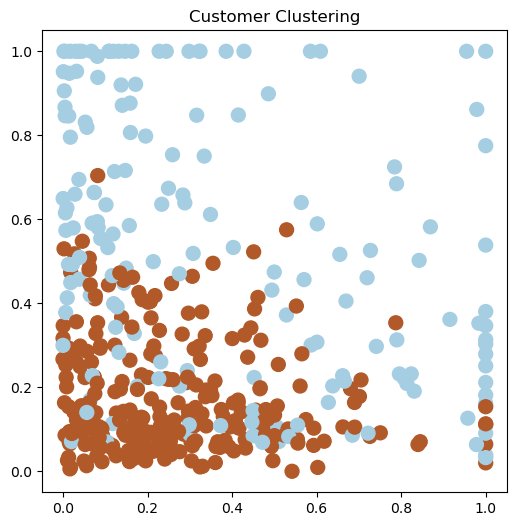

In [228]:
plt.figure(figsize=(6,6))
plt.scatter(X_scaled[:,0],X_scaled[:,2],c=y_pred,s=100,cmap='Paired')
plt.title("Customer Clustering")

## As you can see the DBSCAN not preferd for this kind of distribution of the data

---

## Hierarchical

Text(0, 0.5, 'Euclidean distance')

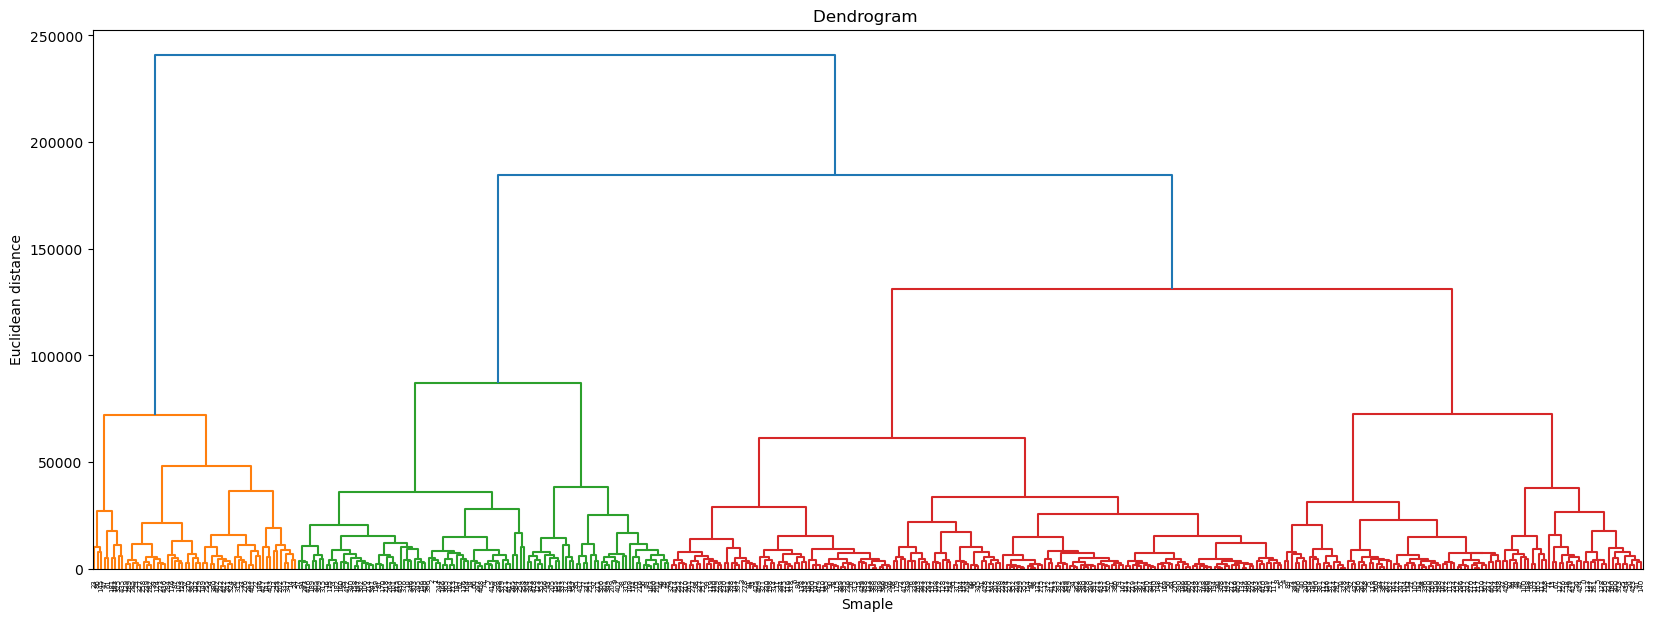

In [74]:
import scipy.cluster.hierarchy as sc

#plot dendrogram

plt.figure(figsize=(20,7))
plt.title("Dendrogram ")

#create dendrogram
sc.dendrogram(sc.linkage(X,method='ward'))
plt.title("Dendrogram ")
plt.xlabel('Smaple')
plt.ylabel("Euclidean distance")

In [76]:
from sklearn.cluster import AgglomerativeClustering

model=AgglomerativeClustering(n_clusters=3,metric='euclidean',linkage='ward')

model.fit(X)
labels=model.labels_

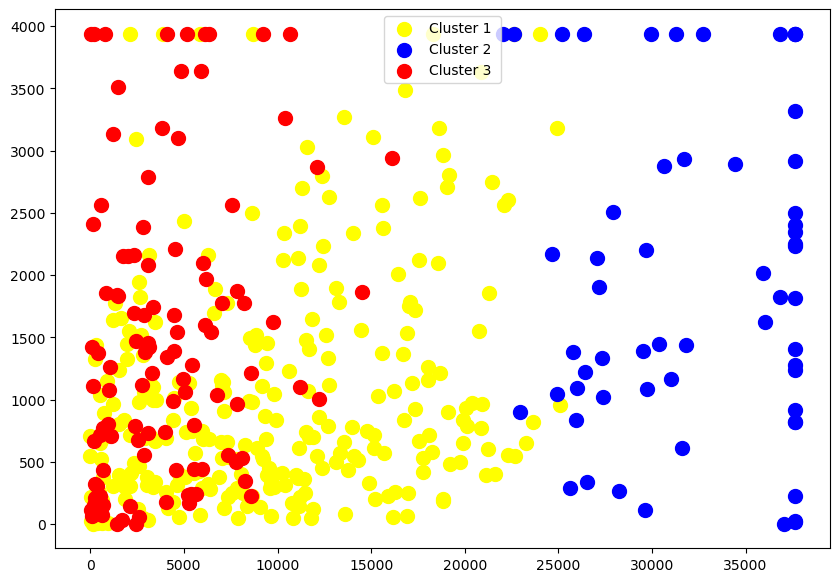

In [82]:
# View in 2D any two features you want with the centroids by adjust the index in X and X_scaled

plt.figure(figsize=(10,7))

plt.scatter(X[labels==0,0],X[labels==0,5],s=100,c='yellow',label="Cluster 1 ")
plt.scatter(X[labels==1,0],X[labels==1,5],s=100,c='blue',label="Cluster 2 ")
plt.scatter(X[labels==2,0],X[labels==2,5],s=100,c='red',label="Cluster 3 ")
plt.legend()
plt.show()


---

# 3D KMeans

In [84]:
import plotly.express as px


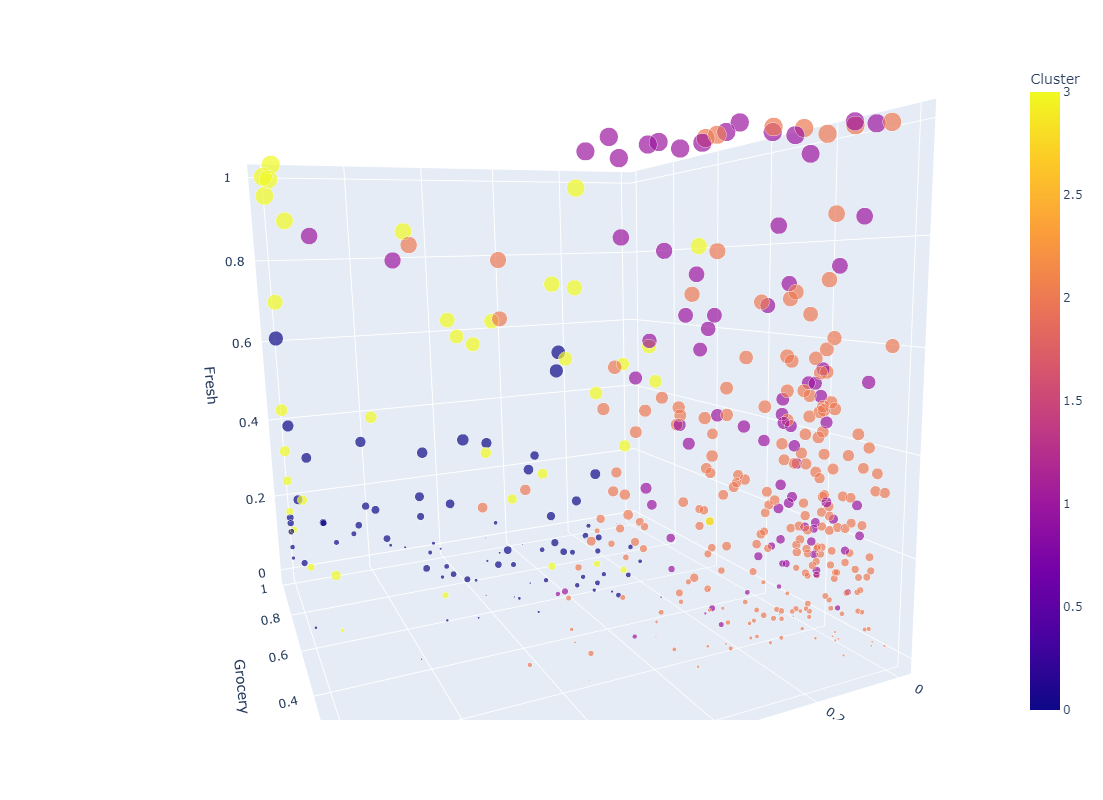

<Figure size 1200x1000 with 0 Axes>

In [95]:
plt.figure(figsize=(12,10))

# You can plot any 3 features you want based on (( KMeans clustring ))
fig = px.scatter_3d(df, x="Grocery", y="Milk", z="Fresh", color='Cluster', size="Fresh", size_max=30)

fig.update_layout(
    width=1200,  # Set the width of the plot
    height=800   # Set the height of the plot
)

fig.show()

